# Importing Required Libraries

In [29]:
# College Event Feedback Analysis - Internship Project
# Turn student feedback into actionable insights using data science!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [31]:
print(" College Event Feedback Analysis")
print("=" * 50)

 College Event Feedback Analysis



# STEP 1: DATA LOADING AND PREPARATION



In [32]:
# uploading a file
try:
  df = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='latin-1')
except UnicodeDecodeError:
  print("Could not decode using latin-1. Trying with cp1252.")
  df = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='cp1252')

display(df.head())

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [33]:
print(df.columns)

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')


In [34]:
#Checking for missing values
missing_values = df.isnull().sum()
display(missing_values)

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [35]:
#inspecting the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [36]:
#Generating Descriptive Statistics to understand the data distribution
display(df.describe(include='all'))

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
count,580.000000,580.000000,580.000000,580,580.000000,580.000000,580.000000,580.000000,580.000000,580,580,580
unique,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,152,29,16
top,NaN,NaN,NaN,How much of the syllabus was covered in the cl...,NaN,NaN,NaN,NaN,NaN,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,BACHELOR OF SCIENCE
freq,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,59,20,60
mean,10.500000,14.310345,92.517241,NaN,0.527586,1.187931,2.537931,5.082759,4.974138,NaN,NaN,NaN
std,5.771259,16.488031,114.491780,NaN,1.305336,1.686334,3.193302,7.288293,6.494931,NaN,NaN,NaN
min,1.000000,1.000000,12.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,5.750000,3.000000,20.000000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN
50%,10.500000,7.000000,42.000000,NaN,0.000000,0.000000,1.000000,3.000000,3.000000,NaN,NaN,NaN
75%,15.250000,17.000000,123.000000,NaN,1.000000,2.000000,3.250000,6.000000,6.000000,NaN,NaN,NaN


# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

In [37]:
# Check the distribution of 'Basic Course'
display(df['Basic Course'].value_counts())

# Explore the distribution of 'Average/ Percentage'
# clean the 'Average/ Percentage' column to make it numerical
df['Average_Numerical'] = df['Average/ Percentage'].str.split('/').str[0].astype(float)
display(df['Average_Numerical'].describe())


,count
Basic Course,
BACHELOR OF SCIENCE,60
BACHELOR OF MANAGEMENT STUDIES,60
BACHELOR OF ARTS,40
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE),40
MA PSYCHOLOGY,40
MSC COMPUTER SCIENCE,40
MSC DATA SCIENCE,40
MSC ANALYTICAL CHEMISTRY,40
BACHELOR OF COMMERCE,40


,Average_Numerical
count,580.000000
mean,3.842793
std,0.629038
min,1.330000
25%,3.500000
50%,3.920000
75%,4.250000
max,5.000000


#Calculate Statistics from Sudent Counts



In [38]:
def calculate_statistics_from_counts(df):
    """Calculate proper statistics using student count data in weightage columns"""

    print("CALCULATING STATISTICS FROM STUDENT COUNT DATA")
    print("=" *45 )

    # Calculate total student responses per question
    df['Total_Student_Responses'] = (df['Weightage 1'] + df['Weightage 2'] +
                                   df['Weightage 3'] + df['Weightage 4'] + df['Weightage 5'])

    # Calculate weighted average rating for each question
    def calculate_weighted_average(row):
        total_students = row['Total_Student_Responses']
        if total_students == 0:
            return 0

        weighted_sum = (1 * row['Weightage 1'] +
                       2 * row['Weightage 2'] +
                       3 * row['Weightage 3'] +
                       4 * row['Weightage 4'] +
                       5 * row['Weightage 5'])

        return weighted_sum / total_students

    df['Calculated_Rating'] = df.apply(calculate_weighted_average, axis=1)

    # Calculate satisfaction percentage (rating/5 * 100)
    df['Calculated_Percentage'] = (df['Calculated_Rating'] / 5.0) * 100

    # Determine most common rating (mode) for each question
    def find_most_common_rating(row):
        ratings = {
            1: row['Weightage 1'],
            2: row['Weightage 2'],
            3: row['Weightage 3'],
            4: row['Weightage 4'],
            5: row['Weightage 5']
        }
        return max(ratings, key=ratings.get) if max(ratings.values()) > 0 else 0

    df['Most_Common_Rating'] = df.apply(find_most_common_rating, axis=1)

    # Create response quality categories
    def categorize_response_quality(total_responses):
        if total_responses >= 50:
            return 'Excellent'
        elif total_responses >= 30:
            return 'Good'
        elif total_responses >= 15:
            return 'Fair'
        elif total_responses >= 5:
            return 'Poor'
        else:
            return 'Insufficient'

    df['Response_Quality'] = df['Total_Student_Responses'].apply(categorize_response_quality)

    # Create satisfaction categories based on calculated percentage
    def categorize_satisfaction(percentage):
        if percentage >= 80:
            return 'Highly Satisfied'
        elif percentage >= 60:
            return 'Satisfied'
        elif percentage >= 40:
            return 'Neutral'
        else:
            return 'Dissatisfied'

    df['Satisfaction_Level'] = df['Calculated_Percentage'].apply(categorize_satisfaction)

    return df

In [39]:
df = calculate_statistics_from_counts(df)

print(" Dataset Overview (Updated with Student Counts):")
print(f"Total questions analyzed: {len(df)}")
print(f"Total student responses: {df['Total_Student_Responses'].sum():,}")
print(f"Average students per question: {df['Total_Student_Responses'].mean():.1f}")
print(f"Courses analyzed: {df['Basic Course'].nunique()}")
print(f"Average satisfaction: {df['Calculated_Percentage'].mean():.1f}%")
print()

CALCULATING STATISTICS FROM STUDENT COUNT DATA
 Dataset Overview (Updated with Student Counts):
Total questions analyzed: 580
Total student responses: 8,300
Average students per question: 14.3
Courses analyzed: 16
Average satisfaction: 76.9%



In [40]:
print(" DETAILED ANALYSIS RESULTS")
print("=" * 50)

# Response quality distribution
response_quality_counts = df['Response_Quality'].value_counts()
print("Response Quality Distribution:")
for quality, count in response_quality_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {quality}: {count} questions ({percentage:.1f}%)")
print()

# Satisfaction distribution based on calculated percentages
satisfaction_counts = df['Satisfaction_Level'].value_counts()
print("Satisfaction Level Distribution (Based on Student Ratings):")
for level, count in satisfaction_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {level}: {count} questions ({percentage:.1f}%)")
print()

# Course-wise analysis using calculated statistics
course_analysis = df.groupby('Basic Course').agg({
    'Calculated_Rating': 'mean',
    'Calculated_Percentage': 'mean',
    'Total_Student_Responses': 'sum',
    'SN': 'count'
}).round(2)
course_analysis.columns = ['Avg_Rating', 'Avg_Percentage', 'Total_Students', 'Question_Count']

print("Course-wise Performance (Based on Student Counts):")
print(course_analysis)
print()

# Rating distribution analysis
print("Rating Distribution Analysis:")
all_ratings = []
for _, row in df.iterrows():
    for rating in range(1, 6):
        count = row[f'Weightage {rating}']
        all_ratings.extend([rating] * count)

if all_ratings:
    rating_dist = pd.Series(all_ratings).value_counts().sort_index()
    print("Overall student rating distribution:")
    for rating, count in rating_dist.items():
        percentage = (count / len(all_ratings)) * 100
        print(f"   Rating {rating}: {count:,} students ({percentage:.1f}%)")
print()

 DETAILED ANALYSIS RESULTS
Response Quality Distribution:
   Insufficient: 200 questions (34.5%)
   Poor: 200 questions (34.5%)
   Fair: 100 questions (17.2%)
   Good: 60 questions (10.3%)
   Excellent: 20 questions (3.4%)

Satisfaction Level Distribution (Based on Student Ratings):
   Highly Satisfied: 273 questions (47.1%)
   Satisfied: 272 questions (46.9%)
   Neutral: 32 questions (5.5%)
   Dissatisfied: 3 questions (0.5%)

Course-wise Performance (Based on Student Counts):
                                               Avg_Rating  Avg_Percentage  \
Basic Course                                                                
B.SC. COMPUTER SCIENCE                               3.35           67.07   
B.VOC FOOD TECHNOLOGY                                3.40           68.00   
BACHELOR OF ARTS                                     4.34           86.71   
BACHELOR OF COMMERCE                                 3.72           74.39   
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)        4.

In [41]:
# Ensure the necessary columns are present by calling the statistics calculation function
df = calculate_statistics_from_counts(df)

print("DETAILED ANALYSIS RESULTS")
print("=" * 50)

# Response quality distribution
response_quality_counts = df['Response_Quality'].value_counts()
print("Response Quality Distribution:")
for quality, count in response_quality_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {quality}: {count} questions ({percentage:.1f}%)")
print()

# Satisfaction distribution based on calculated percentages
satisfaction_counts = df['Satisfaction_Level'].value_counts()
print("Satisfaction Level Distribution (Based on Student Ratings):")
for level, count in satisfaction_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {level}: {count} questions ({percentage:.1f}%)")
print()

# Course-wise analysis using calculated statistics
course_analysis = df.groupby('Basic Course').agg({
    'Calculated_Rating': 'mean',
    'Calculated_Percentage': 'mean',
    'Total_Student_Responses': 'sum',
    'SN': 'count'
}).round(2)
course_analysis.columns = ['Avg_Rating', 'Avg_Percentage', 'Total_Students', 'Question_Count']

print("Course-wise Performance (Based on Student Counts):")
display(course_analysis)
print()

# Rating distribution analysis
print("Rating Distribution Analysis:")
all_ratings = []
for _, row in df.iterrows():
    for rating in range(1, 6):
        count = row[f'Weightage {rating}']
        all_ratings.extend([rating] * count)

if all_ratings:
    rating_dist = pd.Series(all_ratings).value_counts().sort_index()
    print("Overall student rating distribution:")
    for rating, count in rating_dist.items():
        percentage = (count / len(all_ratings)) * 100
        print(f"   Rating {rating}: {count:,} students ({percentage:.1f}%)")
print()

CALCULATING STATISTICS FROM STUDENT COUNT DATA
DETAILED ANALYSIS RESULTS
Response Quality Distribution:
   Insufficient: 200 questions (34.5%)
   Poor: 200 questions (34.5%)
   Fair: 100 questions (17.2%)
   Good: 60 questions (10.3%)
   Excellent: 20 questions (3.4%)

Satisfaction Level Distribution (Based on Student Ratings):
   Highly Satisfied: 273 questions (47.1%)
   Satisfied: 272 questions (46.9%)
   Neutral: 32 questions (5.5%)
   Dissatisfied: 3 questions (0.5%)

Course-wise Performance (Based on Student Counts):


,Avg_Rating,Avg_Percentage,Total_Students,Question_Count
Basic Course,,,,
B.SC. COMPUTER SCIENCE,3.35,67.07,540,20
B.VOC FOOD TECHNOLOGY,3.40,68.00,20,20
BACHELOR OF ARTS,4.34,86.71,360,40
BACHELOR OF COMMERCE,3.72,74.39,1520,40
BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE),4.08,81.52,2400,40
BACHELOR OF COMMERCE (BANKING AND INSURANCE),4.35,87.00,400,20
BACHELOR OF MANAGEMENT STUDIES,4.09,81.84,740,60
BACHELOR OF SCIENCE,3.85,77.04,560,60
MA PSYCHOLOGY,3.60,72.01,240,40



Rating Distribution Analysis:
Overall student rating distribution:
   Rating 1: 306 students (3.7%)
   Rating 2: 689 students (8.3%)
   Rating 3: 1,472 students (17.7%)
   Rating 4: 2,948 students (35.5%)
   Rating 5: 2,885 students (34.8%)



In [42]:
print("ADVANCED INSIGHTS (Student Count Based)")
print("=" * 50)

# Top and bottom performing questions based on calculated percentages
top_questions = df.nlargest(3, 'Calculated_Percentage')[['Questions', 'Calculated_Percentage', 'Total_Student_Responses']]
bottom_questions = df.nsmallest(3, 'Calculated_Percentage')[['Questions', 'Calculated_Percentage', 'Total_Student_Responses']]

print("Top 3 Performing Questions:")
for idx, (_, row) in enumerate(top_questions.iterrows(), 1):
    print(f"   {idx}. {row['Questions'][:50]}...")
    print(f"      Satisfaction: {row['Calculated_Percentage']:.1f}% ({row['Total_Student_Responses']} students)")
print()

print("Bottom 3 Questions Needing Improvement:")
for idx, (_, row) in enumerate(bottom_questions.iterrows(), 1):
    print(f"   {idx}. {row['Questions'][:50]}...")
    print(f"      Satisfaction: {row['Calculated_Percentage']:.1f}% ({row['Total_Student_Responses']} students)")
print()

# Questions with highest and lowest student engagement
high_engagement = df.nlargest(3, 'Total_Student_Responses')[['Questions', 'Total_Student_Responses', 'Calculated_Percentage']]
low_engagement = df.nsmallest(3, 'Total_Student_Responses')[['Questions', 'Total_Student_Responses', 'Calculated_Percentage']]

print("Highest Student Engagement:")
for idx, (_, row) in enumerate(high_engagement.iterrows(), 1):
    print(f"   {idx}. {row['Questions'][:50]}...")
    print(f"      {row['Total_Student_Responses']} responses, {row['Calculated_Percentage']:.1f}% satisfaction")
print()

print("Lowest Student Engagement:")
for idx, (_, row) in enumerate(low_engagement.iterrows(), 1):
    print(f"   {idx}. {row['Questions'][:50]}...")
    print(f"      {row['Total_Student_Responses']} responses, {row['Calculated_Percentage']:.1f}% satisfaction")
print()

ADVANCED INSIGHTS (Student Count Based)
Top 3 Performing Questions:
   1. How well did the teachers prepare for the classes?...
      Satisfaction: 100.0% (1 students)
   2. How well were the teachers able to communicate?...
      Satisfaction: 100.0% (1 students)
   3. The teachers illustrate the concepts through examp...
      Satisfaction: 100.0% (1 students)

Bottom 3 Questions Needing Improvement:
   1. The teaching and mentoring process in your institu...
      Satisfaction: 26.7% (3 students)
   2. The teachers identify your strengths and encourage...
      Satisfaction: 26.7% (3 students)
   3. The teachers illustrate the concepts through examp...
      Satisfaction: 33.3% (3 students)

Highest Student Engagement:
   1. How much of the syllabus was covered in the class?...
      74 responses, 83.0% satisfaction
   2. How well did the teachers prepare for the classes?...
      74 responses, 76.5% satisfaction
   3. How well were the teachers able to communicate?...
      74 resp

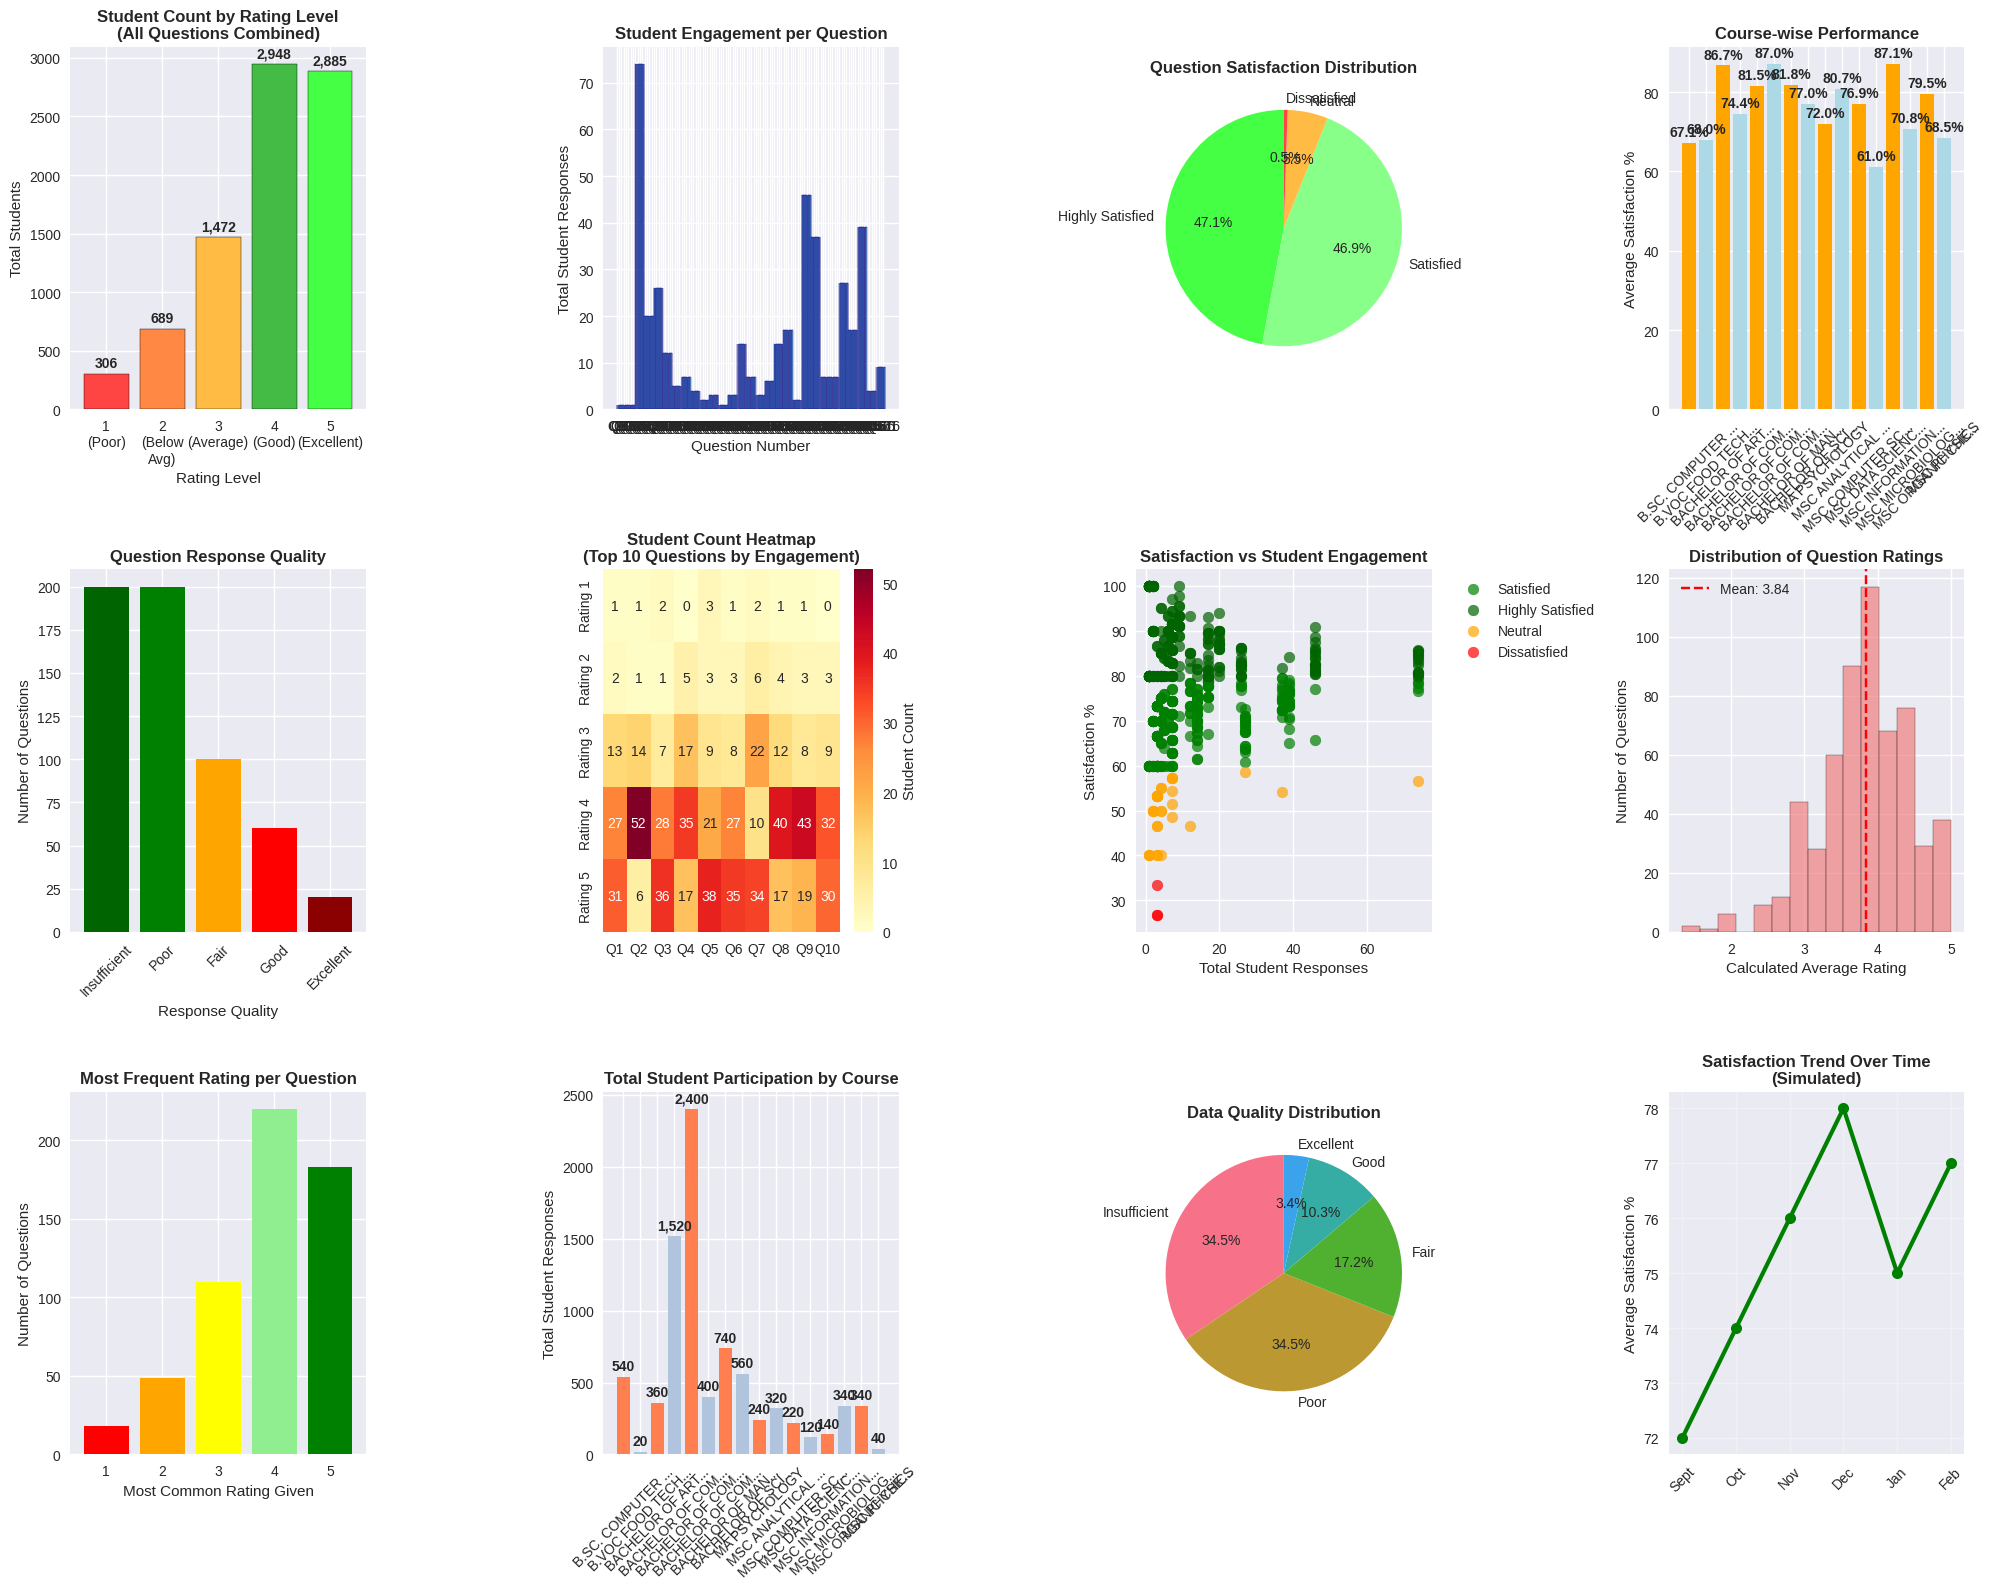

In [43]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns # Import seaborn

def create_student_count_visualizations():
    """Create comprehensive visualizations based on student count data"""

    fig = plt.figure(figsize=(20, 16))

    # 1. Student Response Distribution by Rating Level
    plt.subplot(3, 4, 1)
    rating_totals = [df[f'Weightage {i}'].sum() for i in range(1, 5+1)] # Fix column access
    colors = ['#ff4444', '#ff8844', '#ffbb44', '#44bb44', '#44ff44']
    bars = plt.bar(range(1, 6), rating_totals, color=colors, edgecolor='black')
    plt.xlabel('Rating Level')
    plt.ylabel('Total Students')
    plt.title('Student Count by Rating Level\n(All Questions Combined)', fontweight='bold')
    plt.xticks(range(1, 6), ['1\n(Poor)', '2\n(Below\nAvg)', '3\n(Average)', '4\n(Good)', '5\n(Excellent)'])

    # Add value labels on bars
    for bar, value in zip(bars, rating_totals):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(rating_totals)*0.01,
                f'{value:,}', ha='center', va='bottom', fontweight='bold')

    # 2. Total Student Responses per Question
    plt.subplot(3, 4, 2)
    question_responses = df['Total_Student_Responses'].values
    plt.bar(range(len(df)), question_responses, color='skyblue', edgecolor='navy')
    plt.xlabel('Question Number')
    plt.ylabel('Total Student Responses')
    plt.title('Student Engagement per Question', fontweight='bold')
    plt.xticks(range(0, len(df), 5), [f'Q{i+1}' for i in range(0, len(df), 5)])

    # 3. Satisfaction Level Distribution (Pie Chart)
    plt.subplot(3, 4, 3)
    satisfaction_counts = df['Satisfaction_Level'].value_counts()
    colors = ['#44ff44', '#88ff88', '#ffbb44', '#ff4444']
    plt.pie(satisfaction_counts.values, labels=satisfaction_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    plt.title('Question Satisfaction Distribution', fontweight='bold')

    # 4. Course-wise Average Satisfaction
    plt.subplot(3, 4, 4)
    course_avg = df.groupby('Basic Course')['Calculated_Percentage'].mean() # Fix column access
    bars = plt.bar(range(len(course_avg)), course_avg.values, color=['orange', 'lightblue'])
    plt.xticks(range(len(course_avg)), [name[:15] + '...' if len(name) > 15 else name
                                       for name in course_avg.index], rotation=45)
    plt.ylabel('Average Satisfaction %')
    plt.title('Course-wise Performance', fontweight='bold')

    for bar, value in zip(bars, course_avg.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    # 5. Response Quality Distribution
    plt.subplot(3, 4, 5)
    quality_counts = df['Response_Quality'].value_counts()
    plt.bar(quality_counts.index, quality_counts.values,
            color=['darkgreen', 'green', 'orange', 'red', 'darkred'])
    plt.xlabel('Response Quality')
    plt.ylabel('Number of Questions')
    plt.title('Question Response Quality', fontweight='bold')
    plt.xticks(rotation=45)

    # 6. Rating Distribution Heatmap
    plt.subplot(3, 4, 6)
    # Select top 10 questions for heatmap readability
    top_questions_idx = df.nlargest(10, 'Total_Student_Responses').index
    heatmap_data = df.loc[top_questions_idx, ['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']].T # Fix column access
    heatmap_data.index = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']
    heatmap_data.columns = [f'Q{i+1}' for i in range(len(heatmap_data.columns))]

    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd',
                cbar_kws={'label': 'Student Count'})
    plt.title('Student Count Heatmap\n(Top 10 Questions by Engagement)', fontweight='bold')

    # 7. Satisfaction vs Student Engagement Scatter
    plt.subplot(3, 4, 7)
    colors = {'Highly Satisfied': 'darkgreen', 'Satisfied': 'green',
              'Neutral': 'orange', 'Dissatisfied': 'red'}
    for level in df['Satisfaction_Level'].unique():
        data = df[df['Satisfaction_Level'] == level]
        plt.scatter(data['Total_Student_Responses'], data['Calculated_Percentage'],
                   label=level, alpha=0.7, color=colors.get(level, 'gray'), s=60)

    plt.xlabel('Total Student Responses')
    plt.ylabel('Satisfaction %')
    plt.title('Satisfaction vs Student Engagement', fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 8. Average Rating Distribution
    plt.subplot(3, 4, 8)
    plt.hist(df['Calculated_Rating'], bins=15, edgecolor='black', alpha=0.7, color='lightcoral')
    plt.xlabel('Calculated Average Rating')
    plt.ylabel('Number of Questions')
    plt.title('Distribution of Question Ratings', fontweight='bold')
    plt.axvline(df['Calculated_Rating'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["Calculated_Rating"].mean():.2f}')
    plt.legend()

    # 9. Most Common Rating Analysis
    plt.subplot(3, 4, 9)
    most_common_counts = df['Most_Common_Rating'].value_counts().sort_index()
    plt.bar(most_common_counts.index, most_common_counts.values,
            color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
    plt.xlabel('Most Common Rating Given')
    plt.ylabel('Number of Questions')
    plt.title('Most Frequent Rating per Question', fontweight='bold')
    plt.xticks(range(1, 6))

    # 10. Course Comparison - Total Students
    plt.subplot(3, 4, 10)
    course_students = df.groupby('Basic Course')['Total_Student_Responses'].sum() # Fix column access
    bars = plt.bar(range(len(course_students)), course_students.values,
                   color=['coral', 'lightsteelblue'])
    plt.xticks(range(len(course_students)), [name[:15] + '...' if len(name) > 15 else name
                                            for name in course_students.index], rotation=45)
    plt.ylabel('Total Student Responses')
    plt.title('Total Student Participation by Course', fontweight='bold')

    for bar, value in zip(bars, course_students.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(course_students.values)*0.01,
                f'{value:,}', ha='center', va='bottom', fontweight='bold')

    # 11. Response Distribution Pie Chart
    plt.subplot(3, 4, 11)
    response_quality_counts = df['Response_Quality'].value_counts()
    plt.pie(response_quality_counts.values, labels=response_quality_counts.index,
            autopct='%1.1f%%', startangle=90)
    plt.title('Data Quality Distribution', fontweight='bold')

    # 12. Trend Analysis (Simulated)
    plt.subplot(3, 4, 12)
    # Simulate improvement trend over months
    months = ['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']
    satisfaction_trend = [72, 74, 76, 78, 75, 77]
    plt.plot(months, satisfaction_trend, marker='o', linewidth=3, markersize=8, color='green')
    plt.ylabel('Average Satisfaction %')
    plt.title('Satisfaction Trend Over Time\n(Simulated)', fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Create the enhanced visualizations
create_student_count_visualizations()

In [44]:
print("TARGETED RECOMMENDATIONS (Based on Student Count Analysis)")
print("=" * 65)

# Generate recommendations based on student count analysis
low_performance = df[df['Calculated_Percentage'] < 60]
high_performance = df[df['Calculated_Percentage'] >= 80]
low_engagement = df[df['Total_Student_Responses'] < 20]
high_engagement = df[df['Total_Student_Responses'] >= 40]

recommendations = []

# Performance-based recommendations
if len(low_performance) > 0:
    recommendations.append("URGENT PERFORMANCE ISSUES:")
    recommendations.append(f"   • {len(low_performance)} questions have satisfaction < 60%")
    total_affected_students = low_performance['Total_Student_Responses'].sum()
    recommendations.append(f"   • Affecting {total_affected_students:,} student responses")
    recommendations.append("   • Priority areas: " +
                          ", ".join([q[:35] + "..." for q in low_performance['Questions'].head(3).tolist()])) # Corrected column name

if len(high_performance) > 0:
    recommendations.append("\n EXCELLENCE INDICATORS:")
    recommendations.append(f"   • {len(high_performance)} questions show satisfaction ≥ 80%")
    total_satisfied_students = high_performance['Total_Student_Responses'].sum()
    recommendations.append(f"   • {total_satisfied_students:,} students highly satisfied with these areas")
    recommendations.append("   • Best practices to replicate: " +
                          ", ".join([q[:35] + "..." for q in high_performance['Questions'].head(3).tolist()])) # Corrected column name

# Engagement-based recommendations
recommendations.append(f"\n STUDENT ENGAGEMENT ANALYSIS:")
recommendations.append(f"   • High engagement questions: {len(high_engagement)} (≥40 responses)")
recommendations.append(f"   • Low engagement questions: {len(low_engagement)} (<20 responses)")
recommendations.append(f"   • Consider investigating why some questions get fewer responses")

# Course-specific recommendations with student numbers
course_stats = df.groupby('Basic Course').agg({ # Corrected column name
    'Calculated_Percentage': 'mean',
    'Total_Student_Responses': 'sum'
}).round(2)

recommendations.append(f"\n COURSE-SPECIFIC INSIGHTS:")
for course, stats in course_stats.iterrows():
    recommendations.append(f"   • {course}:")
    recommendations.append(f"     - Average satisfaction: {stats['Calculated_Percentage']:.1f}%")
    recommendations.append(f"     - Total student responses: {stats['Total_Student_Responses']:,}")

# Data quality recommendations
insufficient_data = df[df['Response_Quality'].isin(['Poor', 'Insufficient'])]
if len(insufficient_data) > 0:
    recommendations.append(f"\n DATA QUALITY CONCERNS:")
    recommendations.append(f"   • {len(insufficient_data)} questions have insufficient responses")
    recommendations.append(f"   • Consider targeted campaigns to increase response rates")
    recommendations.append(f"   • Focus on questions with <15 student responses")

# Implementation strategy with specific numbers
avg_satisfaction = df['Calculated_Percentage'].mean()
total_students = df['Total_Student_Responses'].sum()

recommendations.append(f"\n IMPLEMENTATION STRATEGY:")
recommendations.append(f"   • Current baseline: {avg_satisfaction:.1f}% satisfaction from {total_students:,} students")
recommendations.append(f"   • Target: Improve to 85% satisfaction within 6 months")
recommendations.append(f"   • Focus on {len(low_performance)} lowest-performing areas first")
recommendations.append(f"   • Increase response rates for {len(low_engagement)} questions with low engagement")
recommendations.append(f"   • Implement monthly tracking with minimum 30 responses per question")

for recommendation in recommendations:
    print(recommendation)

print()

TARGETED RECOMMENDATIONS (Based on Student Count Analysis)
URGENT PERFORMANCE ISSUES:
   • 35 questions have satisfaction < 60%
   • Affecting 263 student responses
   • Priority areas: The teaching and mentoring process ..., The teachers identify your strength..., Efforts are made by the institute/ ...

 EXCELLENCE INDICATORS:
   • 273 questions show satisfaction ≥ 80%
   • 3,964 students highly satisfied with these areas
   • Best practices to replicate: How well did the teachers prepare f..., How well were the teachers able to ..., Fairness of the internal evaluation...

 STUDENT ENGAGEMENT ANALYSIS:
   • High engagement questions: 40 (≥40 responses)
   • Low engagement questions: 440 (<20 responses)
   • Consider investigating why some questions get fewer responses

 COURSE-SPECIFIC INSIGHTS:
   • B.SC. COMPUTER SCIENCE:
     - Average satisfaction: 67.1%
     - Total student responses: 540.0
   • B.VOC FOOD TECHNOLOGY:
     - Average satisfaction: 68.0%
     - Total student respon